### Нагдимаев Ильягу ИУ5-65Б Лаб.4

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LinearRegression
warnings.simplefilter("ignore")

In [21]:
# чтение обучающей выборки
data = pd.read_csv('letterdata.csv')
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

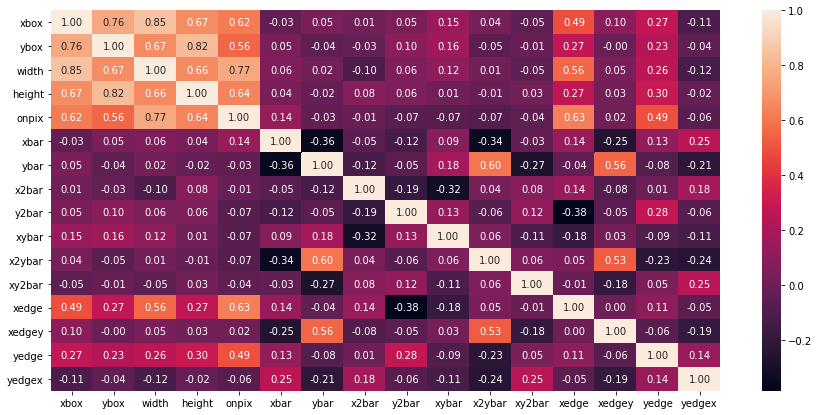

In [23]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [24]:
X = data.drop(['width', 'letter'], axis = 1)
Y = data.width
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    xbox  ybox  height  onpix  xbar  ...  xy2bar  xedge  xedgey  yedge  yedgex
0     2     8       5      1     8  ...       8      0       8      0       8
1     5    12       7      2    10  ...       9      2       8      4      10
2     4    11       8      6    10  ...       7      3       7      3       9
3     7    11       6      3     5  ...      10      6      10      2       8
4     2     1       1      1     8  ...       9      1       7      5      10

[5 rows x 15 columns] 

Выходные данные:

 0    3
1    3
2    6
3    6
4    3
Name: width, dtype: int64


In [25]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

        xbox  ybox  height  onpix  xbar  ...  xy2bar  xedge  xedgey  yedge  yedgex
17964     3     6       5      5     9  ...       8      5       8      9      11
11632     2     1       1      1     6  ...       8      2       7      4      11
10869     4     9       7      3     8  ...       9      3       8      4       7
9179      4    10       8      2     7  ...       6      0      10      2       7
8871      4     8       6      2     8  ...      11      1       6      0       7

[5 rows x 15 columns] 

Входные параметры тестовой выборки:

        xbox  ybox  height  onpix  xbar  ...  xy2bar  xedge  xedgey  yedge  yedgex
19134     3     3       2      1     4  ...       5      1      11      2       5
4981      3     5       4      4     9  ...       7      2       8      5       9
16643     4     8       5      2     3  ...      11      4       8      3      10
19117     5    10       7      4     4  ...       9      3       9      2     

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [27]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

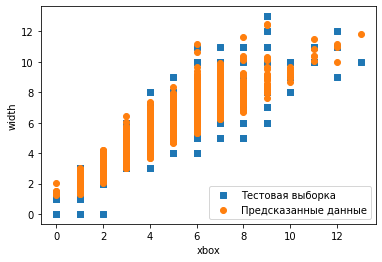

In [ ]:
plt.scatter(X_test.xbox, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.xbox, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('xbox')
plt.ylabel ('width')
plt.show()

### SVM

In [28]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

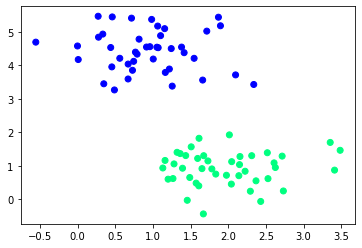

In [29]:
X , y = make_blobs(n_samples=125, centers=2, cluster_std=0.6, random_state=0)
# колич, кол кластеров, станд откл, 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=40, random_state=0)

plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')

In [30]:
svc = SVC(kernel='linear')
svc.fit(train_X,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

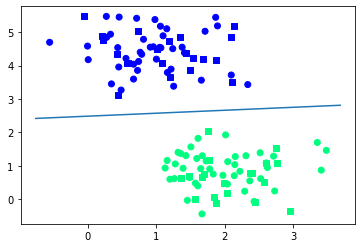

In [31]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')

ax=plt.gca()
xlim=ax.get_xlim()
    
ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap='winter', marker='s')

w= svc.coef_[0]
a= -w[0]/w[1]
xx=np.linspace(xlim[0], xlim[1])
yy= a * xx - (svc.intercept_[0]/ w[1])
plt.plot(xx, yy)

In [32]:
pred_y = svc.predict(test_X)

In [33]:
confusion_matrix(test_y, pred_y)

array([[21,  0],
       [ 0, 19]])

### Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import re

In [ ]:
data = pd.read_csv('letterdata.csv')
X = data.drop(['width', 'letter', 'onpix', 'xbar',  'ybar',  'x2bar',  'y2bar',  'xybar',  'x2ybar',  'xy2bar',  'xedge',  'xedgey',  'yedge',  'yedgex'], axis = 1)
Y = data.width
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    xbox  ybox  height
0     2     8       5
1     5    12       7
2     4    11       8
3     7    11       6
4     2     1       1 

Выходные данные:

 0    3
1    3
2    6
3    6
4    3
Name: width, dtype: int64


In [ ]:
# Обучим дерево на всех признаках iris
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [ ]:
from IPython.core.display import HTML
from sklearn.tree.export import export_text
tree_rules = export_text(clf, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

[Text(103.96580247961957, 211.4, 'X[0] <= 3.5\ngini = 0.855\nsamples = 20000\nvalue = [195, 385, 1285, 1994, 3816, 4262, 3641, 1946, 1418\n679, 237, 91, 39, 6, 4, 2]'),
 Text(49.43657608695652, 199.32, 'X[0] <= 2.5\ngini = 0.766\nsamples = 8459\nvalue = [195, 385, 1284, 1955, 2961, 1503, 176, 0, 0, 0, 0\n0, 0, 0, 0, 0]'),
 Text(26.45445652173913, 187.24, 'X[0] <= 1.5\ngini = 0.728\nsamples = 4302\nvalue = [195, 385, 1283, 1577, 841, 21, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(15.082173913043478, 175.16, 'X[2] <= 3.5\ngini = 0.639\nsamples = 1393\nvalue = [189, 376, 714, 114, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(6.388695652173913, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.584\nsamples = 1169\nvalue = [54, 353, 655, 107, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(2.911304347826087, 151.0, 'X[1] <= 0.5\ngini = 0.499\nsamples = 99\nvalue = [47, 52, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(1.2939130434782609, 138.92000000000002, 'X[2] <= 0.5\ngini = 0.483\nsamples = 76\n

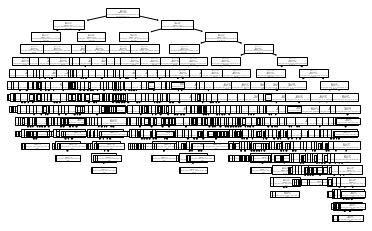

In [ ]:
tree.plot_tree(clf) 